In [556]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt

## 基底クラスの実装

In [557]:
class GradientMethod:
    def __init__(self, dim, lam):
        self.weight = np.array([3.0, -1.0])
        self.lr = 0.0   # 後で設定
        self.lam = lam
        self.weight_history = np.zeros(0)
        
    def proximal_operator(self, v):
        return self.soft_thresholding(v, self.lr * self.lam)

    def soft_thresholding(self, b, lam):
        x = np.zeros(b.shape[0])
        x[np.where(b >= lam)] = b[np.where(b >= lam)] - lam
        x[np.where(b <= -lam)] = b[np.where(b <= -lam)] + lam
        return x
        
    def l1_norm(self):
        return np.linalg.norm(self.weight, np.inf)
            
    def predict(self, mat, vec):
        return np.dot((self.weight-vec), np.dot(A, (self.weight - vec))) \
            + self.lam * self.l1_norm()        
    
    def grad(self, mat, vec):
        return 2 * np.dot(A, (self.weight - vec))

## 結果表示用の関数

In [558]:
def draw(data):
    x_axis = np.arange(epochs)
    plt.xlabel("iteration")
    plt.ylabel("w(t) - w")
    plt.plot(x_axis, data[:, 0], label="w_1")
    plt.plot(x_axis, data[:, 1], label="w_2")
    plt.yscale("log")
    plt.legend()
    plt.show()

## PGの実装

In [559]:
class ProximalGradient(GradientMethod):
    def __init__(self, dim=2, lam=0.01):
        super(ProximalGradient, self).__init__(dim, lam)
                
    def train(self, mat, vec, epochs=10):
        self.weight_history = np.zeros((epochs, len(self.weight)))
        self.lr = (2 * np.max(np.linalg.eigvals(A)))**-1
        for epoch in range(epochs):
            self.weight_history[epoch] = self.weight
            self.weight = self.proximal_operator(
                self.weight - self.lr * self.grad(mat, vec),
            )

## 問題設定

In [560]:
epochs = 100
A = np.array([[3, 0.5],
             [0.5, 1]])
mu = np.array([1, 2])

## λ = 2

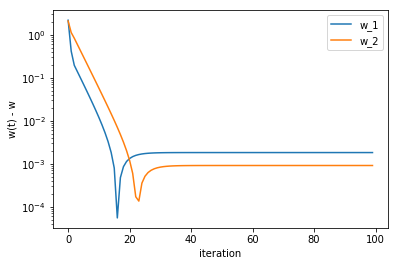

In [561]:
pg = ProximalGradient(lam=2)
pg.train(A, mu, epochs=epochs)
true_w = np.array([0.82, 1.09])
draw(np.abs(pg.weight_history - true_w))

## λ = 4

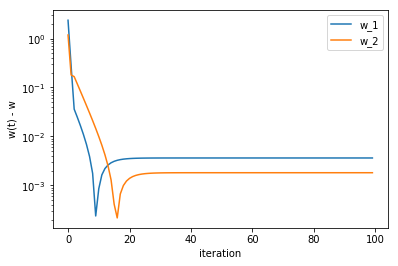

In [562]:
pg = ProximalGradient(lam=4)
pg.train(A, mu, epochs=epochs)
true_w = np.array([0.64, 0.18])
draw(np.abs(pg.weight_history - true_w))

## λ = 6

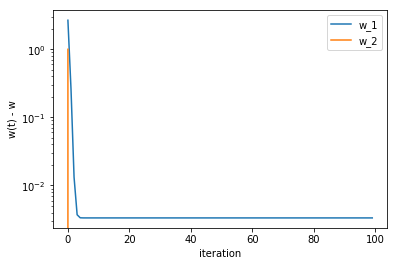

In [563]:
pg = ProximalGradient(lam=6)
pg.train(A, mu, epochs=epochs)
true_w = np.array([0.33, 0])
draw(np.abs(pg.weight_history - true_w))

## APGの実装

In [564]:
class AcceleratedProximalGradient(GradientMethod):
    def __init__(self, dim=2, lam=0.01):
        super(AcceleratedProximalGradient, self).__init__(dim, lam)

    def train(self, mat, vec, epochs=10):
        self.weight_history = np.zeros((epochs, len(self.weight)))
        self.lr = (2 * np.max(np.linalg.eigvals(A)))**-1
        _old_delta = self.weight
        _old_t = 0.0
        for epoch in range(epochs):
            self.weight_history[epoch] = self.weight

            _delta = self.proximal_operator(
                self.weight - self.lr * self.grad(mat, vec),
            )
            _t = (1 + np.sqrt(1 + 4 * _old_t**2)) / 2
            self.weight = _delta + _old_t * (_delta - _old_delta) / _t
            
            _old_t  =_t
            _old_delta = _delta

## λ = 2

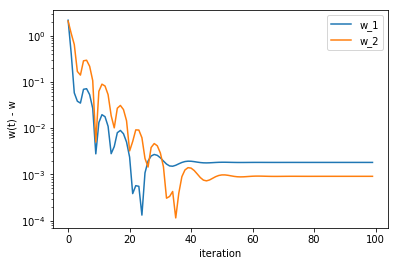

In [565]:
apg = AcceleratedProximalGradient(lam=2)
apg.train(A, mu, epochs=epochs)
true_w = np.array([0.82, 1.09])
draw(np.abs(apg.weight_history - true_w))

## λ = 4

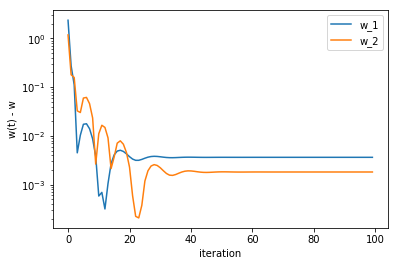

In [566]:
apg = AcceleratedProximalGradient(lam=4)
apg.train(A, mu, epochs=epochs)
true_w = np.array([0.64, 0.18])
draw(np.abs(apg.weight_history - true_w))

## λ = 6

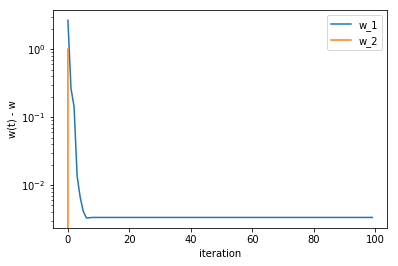

In [567]:
apg = AcceleratedProximalGradient(lam=6)
apg.train(A, mu, epochs=epochs)
true_w = np.array([0.33, 0])
draw(np.abs(apg.weight_history - true_w))

## 問題設定

In [568]:
epochs = 100
A = np.array([[250, 15],
             [15, 4]])
mu = np.array([1, 2])

## AdaGradの実装

In [569]:
class Adagrad(GradientMethod):
    def __init__(self, dim=2, lam=0.01):
        super(Adagrad, self).__init__(dim, lam)
        
    def proximal_operator(self, v, h):
        return self.soft_thresholding(v, self.lr * self.lam * h)

    def soft_thresholding(self, b, lam):
        x = np.zeros(b.shape[0])
        x[np.where(b >= lam)] = b[np.where(b >= lam)] - lam[np.where(b >= lam)]
        x[np.where(b <= -lam)] = b[np.where(b <= -lam)] + lam[np.where(b <= -lam)]
        return x
        
    def train(self, mat, vec, epochs=10):
        self.weight_history = np.zeros((epochs, len(self.weight)))
        self.lr = 500 * (2 * np.max(np.linalg.eigvals(A)))**-1
        
        _eps = 0.02
        _grad = 0.0
        _grad_square = 0.0
        _hesse = 0.0
        for epoch in range(epochs):
            self.weight_history[epoch] = self.weight
            
            _grad += self.grad(mat, vec)
            _grad_square += self.grad(mat, vec)**2
            _hesse = np.sqrt(_grad_square) + _eps
            
            self.weight = self.proximal_operator(
                self.weight - self.lr * np.reciprocal(_hesse) * self.grad(mat, vec),
                np.reciprocal(_hesse)
            )

## λ = 0.89

In [570]:
true_w = np.array([1.00, 1.87])

## PG 

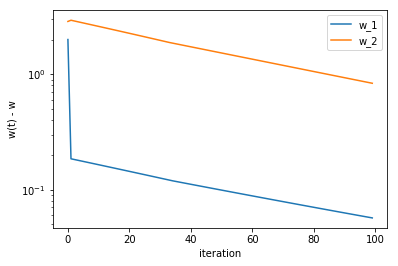

In [571]:
pg = ProximalGradient(lam=0.89)
pg.train(A, mu, epochs=epochs)
draw(np.abs(pg.weight_history - true_w))

## APG

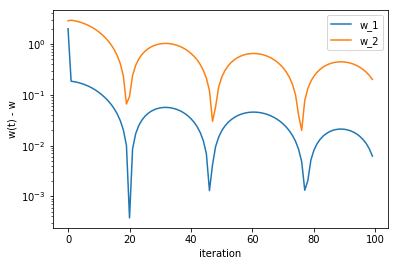

In [572]:
apg = AcceleratedProximalGradient(lam=0.89)
apg.train(A, mu, epochs=epochs)
draw(np.abs(apg.weight_history - true_w))

## AdaGrad

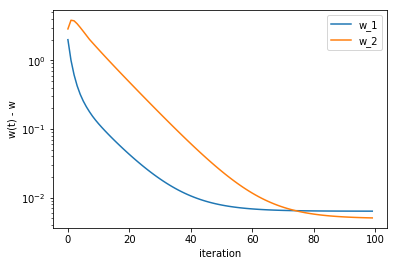

In [573]:
ag = Adagrad(lam=0.89)
ag.train(A, mu, epochs=epochs)
draw(np.abs(ag.weight_history - true_w))

## 各手法の結果を重ねて表示

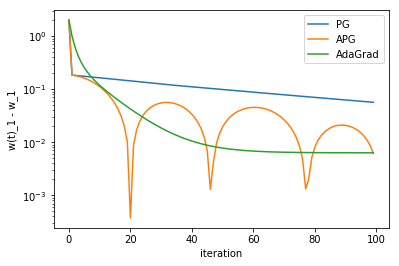

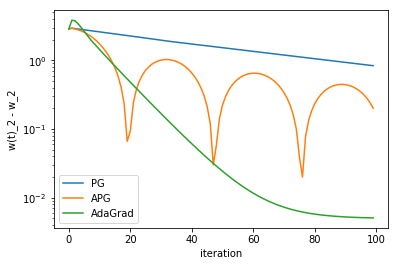

In [574]:
x_axis = np.arange(epochs)

# w_1に関するデータの表示
plt.xlabel("iteration")
plt.ylabel("w(t)_1 - w_1")
plt.plot(x_axis, np.abs(pg.weight_history - true_w)[:, 0], label="PG")
plt.plot(x_axis, np.abs(apg.weight_history - true_w)[:, 0], label="APG")
plt.plot(x_axis, np.abs(ag.weight_history - true_w)[:, 0], label="AdaGrad")
plt.yscale("log")
plt.legend()
plt.show()

# w_2に関するデータの表示
plt.xlabel("iteration")
plt.ylabel("w(t)_2 - w_2")
plt.plot(x_axis, np.abs(pg.weight_history - true_w)[:, 1], label="PG")
plt.plot(x_axis, np.abs(apg.weight_history - true_w)[:, 1], label="APG")
plt.plot(x_axis, np.abs(ag.weight_history - true_w)[:, 1], label="AdaGrad")
plt.yscale("log")
plt.legend()
plt.show()